In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten #Fully connected layers are called Dense in Keras
#Flatten converts multi dimensional vector to single dimension

Load Dataset

In [25]:
X_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels_test.csv', delimiter = ',')


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
X_train = X_train.reshape(len(X_train),100, 100, 3) 
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100, 100, 3)
Y_test = Y_test.reshape(len(Y_test),1)

#Rescaling,, default array vals will be upto 255 for rgb 
# Dividing by 255 or normalizing

X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
print("Shape of X_train:", X_train.shape) #2000 training datasets,  3channel*100*100
print("Shape of Y_train:", Y_train.shape)

print("Shape of X_test:", X_test.shape) #400 test datasets, 3channel*100*100
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [28]:
X_train[1,:] #Normalized value between 0 and 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [10]:
import matplotlib.pyplot as plt
import random

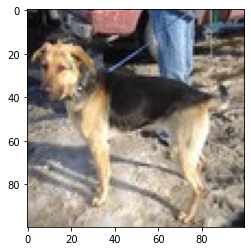

In [15]:
idx = random.randint(0, len(X_train))#this value will have any random data value
plt.imshow(X_train[idx, :])
plt.show()

Keras Model

In [18]:
# Sequential model means layers are going to be stacked up in sequence: Convolutional layer, Maxpooling Layer
#model = Sequential([
#    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), 
    #32 number of layers say, next parameter is size, relu shape which model expects in keras
    #Next we add Maxpooling layer
#    MaxPoolin2D((2,2)) #2,2 is Filter size


#    layers.Conv2D(32, (3,3), activation='relu'),
#    MaxPooling2D((2,2)),

#    Flatten(),
#    Dense(64, activation = 'relu'), #64 neurons we want to keep
#    Dense (1, activation = 'sigmoid') #Final layer
    #sigmoid because its a binary classification
#])

SyntaxError: ignored

In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

Now We will add cost function and perform back propagation

In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
model.fit(X_train, Y_train, epochs=5, batch_size = 64) #More epoch improves the accuracy

Epoch 1/5
32/32 [==============================] - 23s 686ms/step - loss: 0.7508 - accuracy: 0.5215
Epoch 2/5
32/32 [==============================] - 22s 684ms/step - loss: 0.6725 - accuracy: 0.5735
Epoch 3/5
32/32 [==============================] - 23s 726ms/step - loss: 0.6437 - accuracy: 0.6525
Epoch 4/5
32/32 [==============================] - 22s 689ms/step - loss: 0.6106 - accuracy: 0.6650
Epoch 5/5
32/32 [==============================] - 22s 690ms/step - loss: 0.5489 - accuracy: 0.7215


In [33]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 130ms/step - loss: 0.6008 - accuracy: 0.6725


[0.6008239984512329, 0.6725000143051147]

Making Prediction

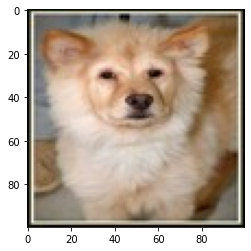

1/1 [==============================] - 0s 24ms/step
Model says subject is: dog


In [35]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'

else:
  pred = 'cat'

print("Model says subject is:",pred)